Importing all the relevant pacakages including the stats package which is important for conducting any sort of statistical testing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Reading the csv file into a dataframe called df

In [3]:
df = pd.read_csv('/Users/shubhangimallik/Downloads/experiment_dataset.csv')

In [4]:
df

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...,...
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423


1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

Using the info function to see if there are any missing data in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


There are a 1000 rows in the dataset and all the rows have some value so there is no null values in the dataset. This means there is no missing data in the dataset

In [6]:
df.describe(include='all')

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,3,3,3,NaN,NaN
top,NaN,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,NaN,343,346,340,NaN,NaN
mean,499.500000,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,288.819436,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,0.000000,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,249.750000,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,499.500000,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,749.250000,53.000000,NaN,NaN,NaN,26.255950,0.124238


In [7]:
df.tail(10)

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
990,990,54,Location3,Device1,Control,19.357402,0.100896
991,991,35,Location3,Device1,Variant B,22.409808,0.100951
992,992,44,Location1,Device2,Variant A,20.161483,0.098470
993,993,24,Location3,Device3,Variant A,27.390527,0.095718
994,994,52,Location1,Device2,Control,15.012350,0.071914
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423
999,999,55,Location1,Device1,Variant B,25.803169,0.166688


In [8]:
df.head(10)

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
5,5,27,Location3,Device1,Variant B,26.129246,0.149341
6,6,37,Location3,Device3,Variant B,20.525362,0.095788
7,7,39,Location2,Device1,Variant A,21.525217,0.149985
8,8,54,Location3,Device2,Control,21.910608,0.135535
9,9,41,Location1,Device2,Variant A,27.642788,0.137266


I'm using the groupby function to find the mean Time Spent and CTR for all three locations

In [9]:
df.groupby('Location')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Location,,
Location1,22.707286,0.110217
Location2,22.648998,0.108517
Location3,22.787691,0.108708


Average Time spent and Average CTR is similar in all three locations

I'm using the groupby function to find the mean Time Spent and CTR for all three devices

In [10]:
df.groupby('Device')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Device,,
Device1,22.635032,0.109634
Device2,22.890021,0.109868
Device3,22.612276,0.107993


Average Time spent and Average CTR is similar for all three devices

I'm using the groupby function to find the mean Time Spent and CTR for all the ages

In [11]:
df.groupby('Age')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Age,,
18,21.805160,0.104431
19,24.301099,0.113928
20,22.658484,0.106769
21,23.174444,0.106317
22,23.339777,0.111566
23,21.203465,0.111024
24,21.505956,0.109765
25,23.541231,0.109907
26,22.598906,0.110061


I'm using the groupby function to find the mean Time Spent and CTR for all three Variants

In [12]:
df.groupby('Variant')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Variant,,
Control,20.070781,0.098554
Variant A,24.805547,0.120269
Variant B,23.343783,0.108933


The following code is to see if there is any correlation between age groups and CTR, Time spent. Since there are a lot of ages, it would make more sense to group the ages to see if there are any differences across age groups

In [13]:

age_ranges = [
    (18, 24),
    (25, 34),
    (35, 44),
   
]
max_end = df['Age'].max() 
df['age_group'] = pd.cut(df['Age'], bins=[start for start, _ in age_ranges] + [max_end], right=False)
grouped_data = df.groupby('age_group').agg({'CTR': 'mean', 'Time Spent': 'mean'})
print(grouped_data)


                CTR  Time Spent
age_group                      
[18, 25)   0.108860   22.473389
[25, 35)   0.107459   22.885105
[35, 64)   0.109895   22.700820


Here, we can see that the average CTR (the percentage of clicks per impression) is relatively consistent across the age groups, ranging from approximately 10.7% to 10.9%. 

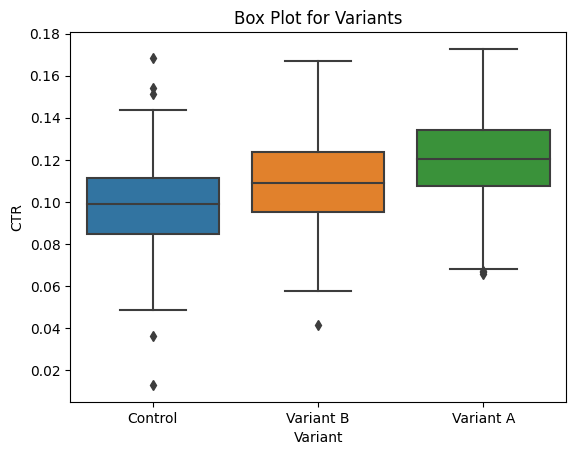

In [16]:

sns.boxplot(x=df['Variant'], y=df['CTR'])
plt.xlabel('Variant')
plt.ylabel('CTR')
plt.title('Box Plot for Variants')
plt.show()


The box plot above shows that the mean CTR of Variant A is higher than the mean CTR of Variant B and control. 

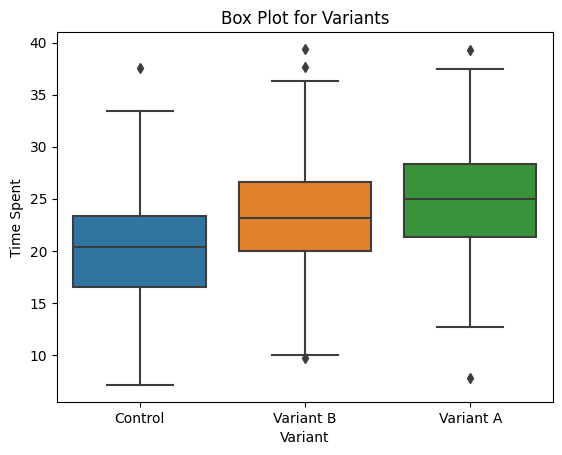

In [17]:

sns.boxplot(x=df['Variant'], y=df['Time Spent'])
plt.xlabel('Variant')
plt.ylabel('Time Spent')
plt.title('Box Plot for Variants')
plt.show()

The box plot above shows that the mean Time Spent of Variant A is higher than the mean Time Spent of Variant B and control. 

In [39]:
var_a = df[df['Variant'] == 'Variant A']['Time Spent']
var_b = df[df['Variant'] == 'Variant B']['Time Spent']
var_c = df[df['Variant'] == 'Control']['Time Spent']

p_val = stats.f_oneway(var_a, var_b, var_c)
print(p_val)

F_onewayResult(statistic=75.60840947416146, pvalue=2.676826588910432e-31)


The p-value obtained from the ANOVA test is approximately 2.68e-31, which is an extremely small value. This indicates strong evidence against the null hypothesis, suggesting that there is a significant difference among the groups

In [41]:
var_a = df[df['Variant'] == 'Variant A']['CTR']
var_b = df[df['Variant'] == 'Variant B']['CTR']
var_c = df[df['Variant'] == 'Control']['CTR']

p_val = stats.f_oneway(var_a, var_b, var_c)
print(p_val)

F_onewayResult(statistic=93.58891593622702, pvalue=5.638952705781554e-38)


Based on the ANOVA test above, I can conclude that there is a significant difference in the CTR among the groups. However, to find which Variant is performing better, I need to do further analysis

Now, I'm finding the Variant A lift for CTR and the Variant B lift for CTR

In [18]:
df2 = df.groupby(by = 'Variant')['CTR'].sum()
lift_variant_a = df2['Variant A'] - df2['Control']
lift_variant_b = df2['Variant B'] - df2['Control']
print('Variant A Lift in CTR:', lift_variant_a)
print('Variant B Lift in CTR:', lift_variant_b)

Variant A Lift in CTR: 6.180520716900553
Variant B Lift in CTR: 2.439491210528942


Variant A Lift in CTR: The value of 6.1805 suggests that Variant A has a CTR that is 6.1805 percentage points higher than the control group. In other words, users who were exposed to Variant A had a higher likelihood of clicking on the intended content compared to users in the control group.


Variant B Lift in CTR: The value of 2.4395 indicates that Variant B has a CTR that is 2.4395 percentage points higher than the control group. This implies that users who experienced Variant B showed a greater tendency to click on the desired content compared to the control group.

In [19]:
df2 = df.groupby(by = 'Variant')['Time Spent'].sum()
lift_variant_a = df2['Variant A'] - df2['Control']
lift_variant_b = df2['Variant B'] - df2['Control']
print('Variant A Lift in Time Spent:', lift_variant_a)
print('Variant B Lift in Time Spent:', lift_variant_b)

Variant A Lift in Time Spent: 1361.7650937699673
Variant B Lift in Time Spent: 879.3828393472804


This suggests that Variant A is more successful in capturing and retaining user attention, resulting in users spending more time engaging with the content or feature being tested. Thereforee, we can conclude that both Variant A and Variant B has a higher time spent value than the control group

2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

To find out if there's a real difference between the variants and the control group in terms of the click-through rate (CTR) or average time spent, we start by assuming there isn't any significant difference. This assumption is called the null hypothesis.

So, the null hypothesis suggests that:

1. For the click-through rate (CTR): There's no important difference in the CTR between the control group and each feature variant. In simpler terms, any differences we see in the CTR could just be due to chance and not because of the specific features being tested.
For the average time spent: There's no significant difference in the average time spent between the control group and each feature variant. This means that any variations we observe in the time spent could be random fluctuations and not necessarily related to the features being evaluated.

2. To test these hypotheses, we use statistical tools like the t-test. The t-test helps us determine if there's a significant difference in CTR and average time spent between each feature variant and the control group. By calculating the t-value using the t-test, we can understand the extent of the differences observed between the group averages.

In addition, we look at the p-value, which tells us how likely it is to get the data we have if the null hypothesis were true. If the calculated p-value is lower than a certain threshold (usually 0.05), it suggests that the observed differences in CTR or average time spent are unlikely to have occurred by chance alone. In that case, we reject the null hypothesis and conclude that there is indeed a meaningful difference between the groups in terms of CTR or average time spent.

The code below uses the scipy.stats module to perform t-tests and obtain statistical values for comparing time spent between different variants. It extracts the 'Time Spent' data for the control group, Variant A, and Variant B from df. Then, it conducts independent t-tests to compare the control group with each variant separately.

In [26]:
from scipy.stats import ttest_ind

variant_a = df[df['Variant'] == 'Variant A']
variant_b = df[df['Variant'] == 'Variant B']
control = df[df['Variant'] == 'Control']


tstat_ctr_a, pvalue_ctr_a = ttest_ind(variant_a['CTR'], control['CTR'])
tstat_ctr_b, pvalue_ctr_b = ttest_ind(variant_b['CTR'], control['CTR'])

print('CTR - Variant A vs Control:')
print('t-statistic:', tstat_ctr_a)
print('p-value:', pvalue_ctr_a)

print('CTR - Variant B vs Control:')
print('t-statistic:', tstat_ctr_b)
print('p-value:', pvalue_ctr_b)


CTR - Variant A vs Control:
t-statistic: 13.829424737499187
p-value: 1.9602781373243157e-38
CTR - Variant B vs Control:
t-statistic: 6.4718143491783255
p-value: 1.8743198199982106e-10


For CTR (Click-Through Rate):

Variant A vs. Control: The data shows that Variant A has a much higher CTR compared to the control group. The statistical analysis supports this observation, as the p-value is extremely small (1.96e-38). This means there is very strong evidence to suggest that Variant A performs significantly better than the control group in terms of CTR. In simpler terms, Variant A attracts more clicks than the control group.

Variant B vs. Control: Similarly, the data indicates that Variant B has a higher CTR compared to the control group. The statistical analysis confirms this finding, with a small p-value (1.87e-10), indicating strong evidence to reject the null hypothesis. In other words, Variant B performs significantly better than the control group in terms of CTR. To put it simply, Variant B also attracts more clicks than the control group.

In summary, both Variant A and Variant B demonstrate significant improvements in CTR compared to the control group. This means that if you want to maximize the click-through rate, implementing either Variant A or Variant B would likely yield better results than sticking with the control group.

In [28]:
from scipy.stats import ttest_ind

tstat_time_a, pvalue_time_a = ttest_ind(variant_a['Time Spent'], control['Time Spent'])
tstat_time_b, pvalue_time_b = ttest_ind(variant_b['Time Spent'], control['Time Spent'])

print('Time Spent - Variant A vs Control:')
print('t-statistic:', tstat_time_a)
print('p-value:', pvalue_time_a)

print('Time Spent - Variant B vs Control:')
print('t-statistic:', tstat_time_b)
print('p-value:', pvalue_time_b)

Time Spent - Variant A vs Control:
t-statistic: 12.142363487472364
p-value: 8.488565644996449e-31
Time Spent - Variant B vs Control:
t-statistic: 8.174237395991806
p-value: 1.496358076285182e-15


Based on the t-tests conducted, we can interpret the results as follows:

For Time Spent:

Variant A vs. Control: The t-statistic is 12.142, and the p-value is 8.49e-31. The p-value is extremely small, providing strong evidence to reject the null hypothesis. This indicates that Variant A performs significantly better than the control group in terms of Time Spent. In other words, users who experienced Variant A spent a significantly different amount of time compared to those in the control group, and this difference is in favor of Variant A.

Variant B vs. Control: The t-statistic is 8.174, and the p-value is 1.50e-15. Similarly, the p-value is significantly smaller than the chosen significance level. Thus, we can reject the null hypothesis, indicating that Variant B performs significantly better than the control group in terms of Time Spent. Users who encountered Variant B spent a significantly different amount of time compared to the control group, and this difference is in favor of Variant B.

In summary, both Variant A and Variant B outperform the control group in terms of Time Spent. This suggests that implementing either Variant A or Variant B can lead to users spending a significantly different amount of time, and this difference is in favor of the variants when compared to the control group.

In [29]:
from scipy import stats

variant_a_time_spent = df[df['Variant'] == 'Variant A']['Time Spent']
variant_b_time_spent = df[df['Variant'] == 'Variant B']['Time Spent']

variant_a_ctr = df[df['Variant'] == 'Variant A']['CTR']
variant_b_ctr = df[df['Variant'] == 'Variant B']['CTR']


t_statistic_time_spent, p_value_time_spent = stats.ttest_ind(variant_a_time_spent, variant_b_time_spent)


t_statistic_ctr, p_value_ctr = stats.ttest_ind(variant_a_ctr, variant_b_ctr)

print("Time Spent - Variant A vs. Variant B:")
print("T-Statistic:", t_statistic_time_spent)
print("P-Value:", p_value_time_spent)

print("\nCTR - Variant A vs. Variant B:")
print("T-Statistic:", t_statistic_ctr)
print("P-Value:", p_value_ctr)


Time Spent - Variant A vs. Variant B:
T-Statistic: 3.6788175394209075
P-Value: 0.0002534771014765265

CTR - Variant A vs. Variant B:
T-Statistic: 7.08499696316128
P-Value: 3.587180487986577e-12


The above results shows that Variant A performs better than Variant B in terms of both Time Spent and CTR, and these differences are statistically significant. 
The statistical analysis reveals that there are significant differences between Variant A and Variant B in both Time Spent and CTR. The T-statistics for Time Spent and CTR are 3.68 and 7.08, respectively, indicating that the differences are notable. The corresponding P-values of 0.00025 and 3.59e-12 indicate a very low probability of observing such differences by chance alone. 

3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy.

Based on the analysis and statistical testing, it can be concluded that both Variant A and Variant B consistently outperformed the control group in terms of Time Spent and Click-Through Rate (CTR). The results were statistically significant, with p-values well below 0.05, indicating that these differences are unlikely due to chance.

Additionally, when comparing Variant A and Variant B, I found that Variant A had higher average values for both Time Spent and CTR compared to Variant B. These differences were statistically significant, suggesting that Variant A is likely to continue outperforming Variant B in both metrics with a larger sample size.

Based on these findings, it is recommended that the engineering team focuses on deploying Variant A. It demonstrated the highest average lift in both Time Spent and CTR, and the statistical significance of the results provides confidence in its performance. 

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

Roll-out Plan: 

a. Transition Variant B users to Variant A: To ensure a smooth transition, it is recommended to promptly move users from Variant B to Variant A. This prevents users from becoming overly attached to Variant B and minimizes potential resistance or dissatisfaction.

b. Monitor and optimize Variant A: With the control group still in place, continue monitoring the performance of Variant A using a larger user base. This allows for ongoing evaluation of key metrics, such as Time Spent and CTR. Additionally, any necessary adjustments or improvements can be made to further enhance the performance of Variant A before a full-scale launch. The control group serves as a valuable benchmark for assessing the impact of changes.

c. Transition the control group to Variant A: Once Variant A has been fine-tuned and proven to be effective, it is recommended to transition the control group users to Variant A. This transition should be executed as quickly as possible, while ensuring the stability and reliability of the Variant A system.

d. Ensure scalability and demand management: As the transition progresses, closely monitor the scalability of the Variant A system. Make sure it can handle the increased user load without any performance issues. Adjust resources and infrastructure as needed to meet the demands of the growing user base.

e. Communicate the transition to users: Provide clear and transparent communication to users throughout the transition process. Inform them about the reasons for the change, the benefits of Variant A, and address any concerns or questions they may have. This helps to build trust and mitigate any potential resistance.

By following these steps, the company can effectively manage the transition from Variant B to Variant A. The strong performance and statistical significance of Variant A indicate that it is a promising choice for further deployment. The transition should be carried out efficiently, while considering user satisfaction and the overall stability of the system

I will introduce Variant A very quickly as the testing has proved that it performs better both in Time Spend and CTR. There is very little risk in this transition and if there isn't a lot of issues to make this transition, the transition should be done as quickly as possible as the results are very strong